In [1]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import statistics

In [2]:
#read and shuffle data

df = pd.read_csv("dataset_comb.csv")
df = df.sample(frac = 1)

In [3]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [4]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [5]:
#dropping id column as it is not a valid attribute to train model
df = df.drop(['id'], axis = 1)

In [6]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
8852,9285,156.236206,77.049313,0.869939,9545,108.729155,0.697543,381.677,0.800940,2.027743,Gonen
8192,6141,156.637180,50.110612,0.947446,6258,88.424906,0.452542,346.477,0.642836,3.125828,jasmine
8174,5860,154.129481,49.337928,0.947381,5970,86.378144,0.825701,336.355,0.650896,3.123955,jasmine
3946,5517,143.795748,50.218559,0.937035,5691,83.812067,0.634576,323.223,0.663603,2.863399,jasmine
17208,8828,162.956689,69.761554,0.903732,8966,106.019615,0.598468,380.381,0.766716,2.335910,Gonen


In [7]:
#min-max normalisation
#convert class variables:   0 - jasmine & 1 - Gonen

for column in df.columns[:-1]:     
        maximum = df[column].max()   
        minimum = df[column].min()
        df[column]=(df[column]-minimum)/(maximum-minimum)               
   
y=df[df.columns[-1]]
y.where(y=='jasmine',0)
y.where(y=='Gonen',1)
df[df.columns[-1]]=y     

In [8]:
data = df.to_numpy()
data.shape

(18185, 11)

In [9]:
#splitting into 7 folds

data_g = np.array_split(data, 7)

# Logistic Regression

In [10]:
eval_log_validity = []
train_log_validity = []

for i in range(7):
    eval_data = data_g[i]
    eval_data_x = []
    eval_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                eval_data_x.append(data_g[j][w][:10])
                eval_data_y.append(data_g[j][w][10])
                
    #convert into array
    eval_data_xn = np.array(eval_data_x)
    train_data_xn = np.array(train_data_x)
    eval_data_yn = np.array(eval_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0,solver='lbfgs')
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    eval_pred_y_log = clf.predict(eval_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_log = accuracy_score(eval_data_yn, eval_pred_y_log)
    eval_log_validity.append(acc1_log)
    
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    train_log_validity.append(acc2_log)

In [11]:
print("Mean accuracy for test set = ", statistics.mean(eval_log_validity))
print("Mean accuracy for train set = ", statistics.mean(train_log_validity))

Mean accuracy for test set =  0.9868573239321687
Mean accuracy for train set =  0.9870955932781896


# Linear Perceptron

In [12]:
eval_lp_validity = []
train_lp_validity = []

for i in range(7):
    eval_data = data_g[i]
    eval_data_x = []
    eval_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                eval_data_x.append(data_g[j][w][:10])
                eval_data_y.append(data_g[j][w][10])

    #convert into array  
    eval_data_xn = np.array(eval_data_x)
    train_data_xn = np.array(train_data_x)
    eval_data_yn = np.array(eval_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = Perceptron(tol = 1e-3, random_state=0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    eval_pred_y_lp = clf.predict(eval_data_xn)
    train_pred_y_lp = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_lp = accuracy_score(eval_data_yn, eval_pred_y_lp)
    eval_lp_validity.append(acc1_lp)
    
    acc2_lp = accuracy_score(train_data_yn, train_pred_y_lp)
    train_lp_validity.append(acc2_lp)

In [13]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(eval_lp_validity))
print("Mean accuracy for train set = ", statistics.mean(train_lp_validity))

Mean accuracy for test set =  0.9843830624385733
Mean accuracy for train set =  0.9830720814946508


# SVM

In [14]:
eval_svm_validity = []
train_svm_validity = []

for i in range(7):
    eval_data = data_g[i]
    eval_data_x = []
    eval_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                eval_data_x.append(data_g[j][w][:10])
                eval_data_y.append(data_g[j][w][10])
                
    #convert into array
    eval_data_xn = np.array(eval_data_x)
    train_data_xn = np.array(train_data_x)
    eval_data_yn = np.array(eval_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = SVC(kernel = 'rbf',gamma='scale')
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    eval_pred_y_svm = clf.predict(eval_data_xn)
    train_pred_y_svm = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_svm = accuracy_score(eval_data_yn, eval_pred_y_svm)
    eval_svm_validity.append(acc1_svm)
    
    acc2_svm = accuracy_score(train_data_yn, train_pred_y_svm)
    train_svm_validity.append(acc2_svm)

In [15]:
#printing accuracies 

print("Mean accuracy for eval set = ", statistics.mean(eval_svm_validity))
print("Mean accuracy for train set = ", statistics.mean(train_svm_validity))

Mean accuracy for eval set =  0.9899369332962544
Mean accuracy for train set =  0.9898267852639953


# Naive Bayes

In [16]:
eval_nb_validity = []
train_nb_validity = []

for i in range(7):
    eval_data = data_g[i]
    eval_data_x = []
    eval_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                eval_data_x.append(data_g[j][w][:10])
                eval_data_y.append(data_g[j][w][10])
       
    #convert into array         
    eval_data_xn = np.array(eval_data_x)
    train_data_xn = np.array(train_data_x)
    eval_data_yn = np.array(eval_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    eval_pred_y_nb = clf.predict(eval_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(eval_data_yn, eval_pred_y_nb)
    eval_nb_validity.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    train_nb_validity.append(acc2_nb)

In [17]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(eval_nb_validity))
print("Mean accuracy for train set = ", statistics.mean(train_nb_validity))

Mean accuracy for test set =  0.9836127101625309
Mean accuracy for train set =  0.9836953502811502


# Fisher Linear Discriminant

In [18]:
eval_fl_validity = []
train_fl_validity = []

for i in range(7):
    eval_data = data_g[i]
    eval_data_x = []
    eval_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                eval_data_x.append(data_g[j][w][:10])
                eval_data_y.append(data_g[j][w][10])
                
    #convert into array
    eval_data_xn = np.array(eval_data_x)
    train_data_xn = np.array(train_data_x)
    eval_data_yn = np.array(eval_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    eval_pred_y_fl = clf.predict(eval_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(eval_data_yn, eval_pred_y_fl)
    eval_fl_validity.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    train_fl_validity.append(acc2_fl)

In [19]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(eval_fl_validity))
print("Mean accuracy for train set = ", statistics.mean(train_fl_validity))

Mean accuracy for test set =  0.9867473703997638
Mean accuracy for train set =  0.9867748160807042


# Artificial Neural Networks

In [20]:
eval_ann_validity = []
train_ann_validity = []

for i in range(7):
    eval_data = data_g[i]
    eval_data_x = []
    eval_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                eval_data_x.append(data_g[j][w][:10])
                eval_data_y.append(data_g[j][w][10])
                
    #convert into array
    eval_data_xn = np.array(eval_data_x)
    train_data_xn = np.array(train_data_x)
    eval_data_yn = np.array(eval_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10,), max_iter = 1000, activation = 'logistic', solver = 'adam', 
                        random_state = 1)
    
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    eval_pred_y_ann = clf.predict(eval_data_xn)
    train_pred_y_ann = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_ann = accuracy_score(eval_data_yn, eval_pred_y_ann)
    eval_ann_validity.append(acc1_ann)
    
    acc2_ann = accuracy_score(train_data_yn, train_pred_y_ann)
    train_ann_validity.append(acc2_ann)

In [21]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(eval_ann_validity))
print("Mean accuracy for train set = ", statistics.mean(train_ann_validity))

Mean accuracy for test set =  0.9863624801028147
Mean accuracy for train set =  0.9864082166770897


# Box Plot

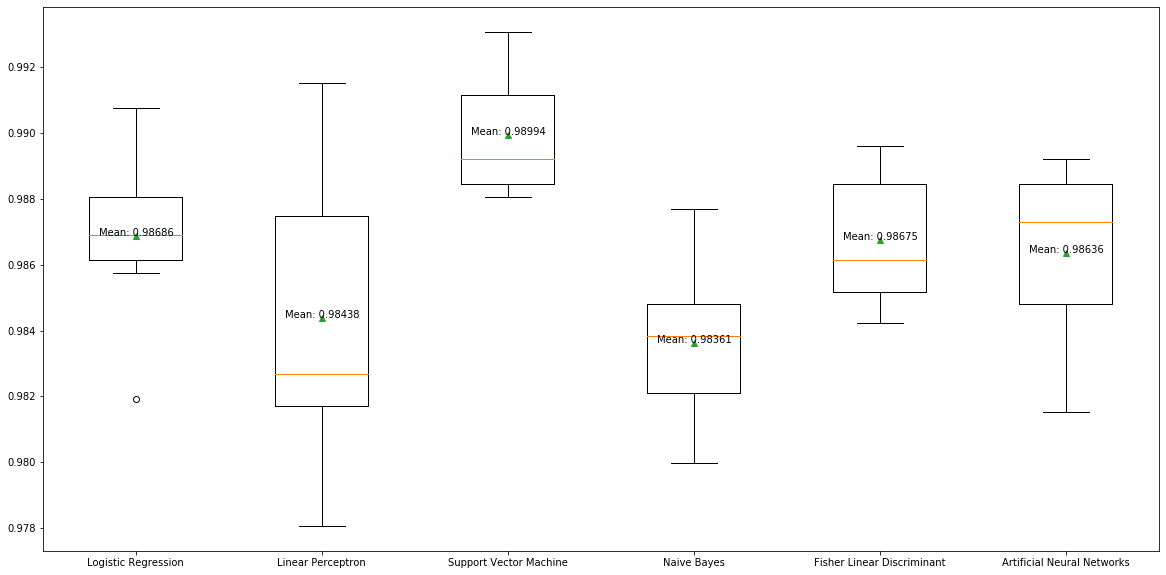

Best Model: Support Vector Machine
Accuracy: 98.994

Worst Model: Naive Bayes
Accuracy: 98.361


In [22]:
labels=["Logistic Regression","Linear Perceptron", "Support Vector Machine","Naive Bayes","Fisher Linear Discriminant","Artificial Neural Networks"]
acclist=[eval_log_validity, eval_lp_validity, eval_svm_validity, eval_nb_validity, eval_fl_validity, eval_ann_validity]

means={}
for i in range(6):
    means[i]=round(statistics.mean(acclist[i]), 5)
means=np.array(list(means.values()))
    
#plot
fig = plt.figure(figsize = (20, 10))
plt.boxplot(acclist,showmeans='true')
plt.xticks(ticks=np.arange(6)+1,labels=labels)

for i in range(6):
    plt.text(i+0.8, means[i], "Mean: "+str(means[i])[:7]) 
plt.show() 


#best and worst
maxi,=np.where(means==np.amax(means))
maxi=maxi[0]
print("Best Model:",labels[maxi])
print("Accuracy:",means[maxi]*100)

mini,=np.where(means==np.amin(means))
mini=mini[0]
print("\nWorst Model:",labels[mini])
print("Accuracy:",means[mini]*100)